In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [135]:
train = pd.read_csv("data.csv")

In [136]:
train.head()

,event_path,server name,event_Message,timestamp,event_Timewirtten,event_Id,event_timeCreated,machine_processor_count,event_provider,ip_address,time
0,System,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,2019-12-30T11:49:07.397Z,2019-12-30T05:48:13Z,16,2019-12-30T11:48:13.013Z,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019-12-30T11:49:07.655Z
1,System,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,2019-12-30T11:49:07.397Z,2019-12-30T05:48:13Z,16,2019-12-30T11:48:13.004Z,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019-12-30T11:49:07.592Z
2,System,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,2019-12-30T11:49:07.397Z,2019-12-30T05:48:12Z,16,2019-12-30T11:48:12.948Z,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019-12-30T11:49:07.525Z
3,System,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,2019-12-30T11:49:07.397Z,2019-12-30T05:48:12Z,16,2019-12-30T11:48:12.419Z,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019-12-30T11:49:07.461Z
4,System,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,2019-12-30T11:49:07.397Z,2019-12-30T05:48:10Z,16,2019-12-30T11:48:10.99Z,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019-12-30T11:49:07.386Z


In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 11 columns):
event_path                 2113 non-null object
server name                2135 non-null object
event_Message              2109 non-null object
timestamp                  2064 non-null object
event_Timewirtten          2064 non-null object
event_Id                   2090 non-null object
event_timeCreated          2064 non-null object
machine_processor_count    2064 non-null float64
event_provider             2064 non-null object
ip_address                 2064 non-null object
time                       2064 non-null object
dtypes: float64(1), object(10)
memory usage: 191.0+ KB


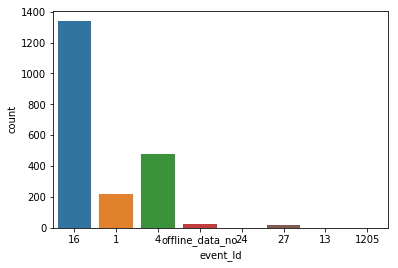

In [138]:
sns.countplot(train['event_Id'])

In [139]:
train['event_path'].value_counts()

System                                                                                                                                                                                                                                                                    2109
 the cluster service may try to bring the resource online on this node or move the group to another node of the cluster and then restart it.  Check the resource and group state using Failover Cluster Manager or the Get-ClusterResource Windows PowerShell cmdlet."       2
 please contact HP Support."                                                                                                                                                                                                                                                 1
CreationClassName="HP_WinEthernetPort"                                                                                                                                                     

Clearly `event_path` is dominated by just one type i.e. `System`. Hence it can be ignored when training. 

In [140]:
train = train.drop('event_path',axis=1)

In [141]:
train['machine_processor_count'].value_counts()

2.0     882
24.0    627
4.0     392
8.0      77
1.0      75
6.0      11
Name: machine_processor_count, dtype: int64

In [142]:
train['ip_address'].value_counts()

20.250.144.30     387
20.63.0.76        267
120.5.20.14       248
20.177.129.62     112
20.192.194.43      72
20.250.144.43      52
20.251.12.17       50
172.15.113.3       49
20.251.24.67       47
32.72.95.181       45
20.251.12.154      43
12.2.19.17         41
20.250.144.28      39
20.251.40.55       35
20.250.144.44      34
20.220.129.90      33
20.250.16.166      32
20.250.144.47      32
20.251.12.247      30
20.250.128.25      30
20.251.12.18       29
20.64.17.44        29
20.251.12.16       28
20.250.144.50      28
20.250.16.20       28
20.251.12.151      27
20.250.128.30      25
20.251.12.155      24
20.251.12.107      22
20.250.16.148      21
20.251.12.32       20
20.251.8.36        17
20.32.96.22        15
20.251.8.37        14
32.72.251.141      12
32.72.170.40       11
20.251.16.75       11
20.192.194.100      7
20.251.12.152       5
32.72.250.198       4
20.80.17.54         4
32.72.150.91        2
32.72.250.74        2
32.72.250.107       1
Name: ip_address, dtype: int64

In [143]:
train['server name'].value_counts()

TMWCDDPN029     387
JTKTUTN000      267
JTKTTMCC01      248
JTPTMTTT000     122
MCHTNDN007       72
PTMTACDPA634     54
TMWCDDPN046      52
PTMTACDPN129     50
TMWCDDQA136      48
PTMTACDPA575     45
PTMTACDPN105     45
PTMTACDPA366     41
TMWCDDPN030      39
PTMTACDPA635     39
TMWCDDDD125      35
TMWCDDPN045      34
MCHTNDN008       33
TMWCDDPN043      32
PTMTACDPA616     32
TMWCDDPN044      31
TMWCDDPD017      30
PTMTACDPN101     30
PTMTACDPA632     30
PTMTACDPA636     30
JTKTMTPN000      29
PTMTACDPA572     28
PTMTACDPA573     27
PTMTACDPA576     27
PTMTACDPN096     25
PTMTACDPA604     22
PTMTACDPD178     22
PTMTACDPW035     17
KTTTMT007        16
Pledge           16
PTMTACDPW036     14
PTMTACDPN028     12
TMWCDDPN008      12
PTMTACDPD190     11
MCHTNDN000        8
Mr Muscle         7
BRRIODPA000       4
PTMTACDPN088      4
Ziploc            3
TMWCDDPN037       2
PTMTACDPN087      2
PTMTACDPN037      1
Name: server name, dtype: int64

We can thus clearly map each server to it's IP address. 

In [144]:
train['event_Message'].value_counts()

Service stopped.                                                                                                                                                                                                  478
The mfevtp MMS Service entered the running state.                                                                                                                                                                 205
Automatic Updates is now paused.                                                                                                                                                                                   17
The access history in hive ~??~C:~Users~A107219~NTUSER.DAT was cleared updating 7 keys and creating 2 modified pages.                                                                                              12
The access history in hive ~??~C:~Users~Administrator~NTUSER.DAT was cleared updating 7 keys and creating 2 modified pages.                     

# Date Preprocessing

In [145]:
import dateparser
from fastai.tabular.transform import add_datepart

In [146]:
add_datepart(train,'event_Timewirtten')
add_datepart(train,'event_timeCreated')
add_datepart(train,'timestamp')
add_datepart(train,'time')

,server name,event_Message,event_Id,machine_processor_count,event_provider,ip_address,event_TimewirttenYear,event_TimewirttenMonth,event_TimewirttenWeek,event_TimewirttenDay,...,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
0,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,16,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577706547
1,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,16,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577706547
2,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,16,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577706547
3,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,16,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577706547
4,PTMTACDPN129,The access history in hive ~SystemRoot~System3...,16,8.0,Microsoft-Windows-Kernel-General,172.15.113.3,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577706547
5,PTMTACDPA366,The access history in hive ~SystemRoot~System3...,16,4.0,Microsoft-Windows-Kernel-General,12.2.19.17,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577705543
6,PTMTACDPA366,The access history in hive ~SystemRoot~System3...,16,4.0,Microsoft-Windows-Kernel-General,12.2.19.17,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577705543
7,PTMTACDPA366,The access history in hive ~SystemRoot~System3...,16,4.0,Microsoft-Windows-Kernel-General,12.2.19.17,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577705543
8,PTMTACDPA366,The access history in hive ~SystemRoot~System3...,16,4.0,Microsoft-Windows-Kernel-General,12.2.19.17,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577705543
9,PTMTACDPA366,The access history in hive ~SystemRoot~System3...,16,4.0,Microsoft-Windows-Kernel-General,12.2.19.17,2019.0,12.0,1.0,30.0,...,30.0,0.0,364.0,False,False,False,False,False,False,1577705543


## Mappings

In [147]:
categorical_varaibles = ['event_Message','server name','event_provider','event_Id']

In [190]:
names = set(train['event_Id'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i
train = train.replace({"event_Id": _map})
del _map

In [148]:
names = set(train['server name'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i
train = train.replace({"server name": _map})
del _map

In [149]:
names = set(train['event_Message'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i

train = train.replace({"event_Message": _map})
del _map

In [150]:
names = set(train['event_provider'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i

train = train.replace({"event_provider": _map})
del _map

# IP Address Feature Extraction

Here we use the IP address to extract the unigram, bigram and trigram. 

For example, take the case of `192.168.1.10`

Unigram : 192 

Bigram : 192 168 

Trigram : 192 168 1

This will allow the model to understand the subnetting structure.

In [151]:
ips = train['ip_address'].astype('str')

In [152]:
unigram = []
bigram = []
trigram = []
for ip in ips:
    # Replace nan with 0.0.0.0
    if ip == 'nan': 
        ip = '0.0.0.0'
    ip = ip.split('.')
    unigram.append(ip[0])
    bigram.append(ip[0] + " " + ip[1])
    trigram.append(ip[0] + " " + ip[1] + " " + ip[2])

In [153]:
train['unigram'] = unigram 
train['bigram'] = bigram 
train['trigram'] = trigram

In [154]:
train['unigram'] = train['unigram'].astype(np.float32)

In [155]:
names = set(train['bigram'])
print(names)
_map = dict()
for i, name in enumerate(names): 
        _map[name] = i
print(_map)
train = train.replace({"bigram": _map})
del _map

{'20 177', '32 72', '20 63', '0 0', '20 32', '20 192', '20 64', '20 80', '20 251', '120 5', '20 220', '172 15', '12 2', '20 250'}
{'20 177': 0, '32 72': 1, '20 63': 2, '0 0': 3, '20 32': 4, '20 192': 5, '20 64': 6, '20 80': 7, '20 251': 8, '120 5': 9, '20 220': 10, '172 15': 11, '12 2': 12, '20 250': 13}


In [156]:
names = set(train['trigram'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i
train = train.replace({"trigram": _map})
del _map

In [158]:
names = set(train['ip_address'])
_map = {}
for i, name in enumerate(names): 
        _map[name] = i
train = train.replace({"ip_address": _map})
del _map

In [159]:
train.head()

,server name,event_Message,event_Id,machine_processor_count,event_provider,ip_address,event_TimewirttenYear,event_TimewirttenMonth,event_TimewirttenWeek,event_TimewirttenDay,...,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed,unigram,bigram,trigram
0,12,219,16,8.0,1,16,2019.0,12.0,1.0,30.0,...,False,False,False,False,False,False,1577706547,172.0,11,19
1,12,323,16,8.0,1,16,2019.0,12.0,1.0,30.0,...,False,False,False,False,False,False,1577706547,172.0,11,19
2,12,553,16,8.0,1,16,2019.0,12.0,1.0,30.0,...,False,False,False,False,False,False,1577706547,172.0,11,19
3,12,252,16,8.0,1,16,2019.0,12.0,1.0,30.0,...,False,False,False,False,False,False,1577706547,172.0,11,19
4,12,153,16,8.0,1,16,2019.0,12.0,1.0,30.0,...,False,False,False,False,False,False,1577706547,172.0,11,19


In [160]:
train.columns

Index(['server name', 'event_Message', 'event_Id', 'machine_processor_count',
       'event_provider', 'ip_address', 'event_TimewirttenYear',
       'event_TimewirttenMonth', 'event_TimewirttenWeek',
       'event_TimewirttenDay', 'event_TimewirttenDayofweek',
       'event_TimewirttenDayofyear', 'event_TimewirttenIs_month_end',
       'event_TimewirttenIs_month_start', 'event_TimewirttenIs_quarter_end',
       'event_TimewirttenIs_quarter_start', 'event_TimewirttenIs_year_end',
       'event_TimewirttenIs_year_start', 'event_TimewirttenElapsed',
       'event_timeCreatedYear', 'event_timeCreatedMonth',
       'event_timeCreatedWeek', 'event_timeCreatedDay',
       'event_timeCreatedDayofweek', 'event_timeCreatedDayofyear',
       'event_timeCreatedIs_month_end', 'event_timeCreatedIs_month_start',
       'event_timeCreatedIs_quarter_end', 'event_timeCreatedIs_quarter_start',
       'event_timeCreatedIs_year_end', 'event_timeCreatedIs_year_start',
       'event_timeCreatedElapsed', 'tim

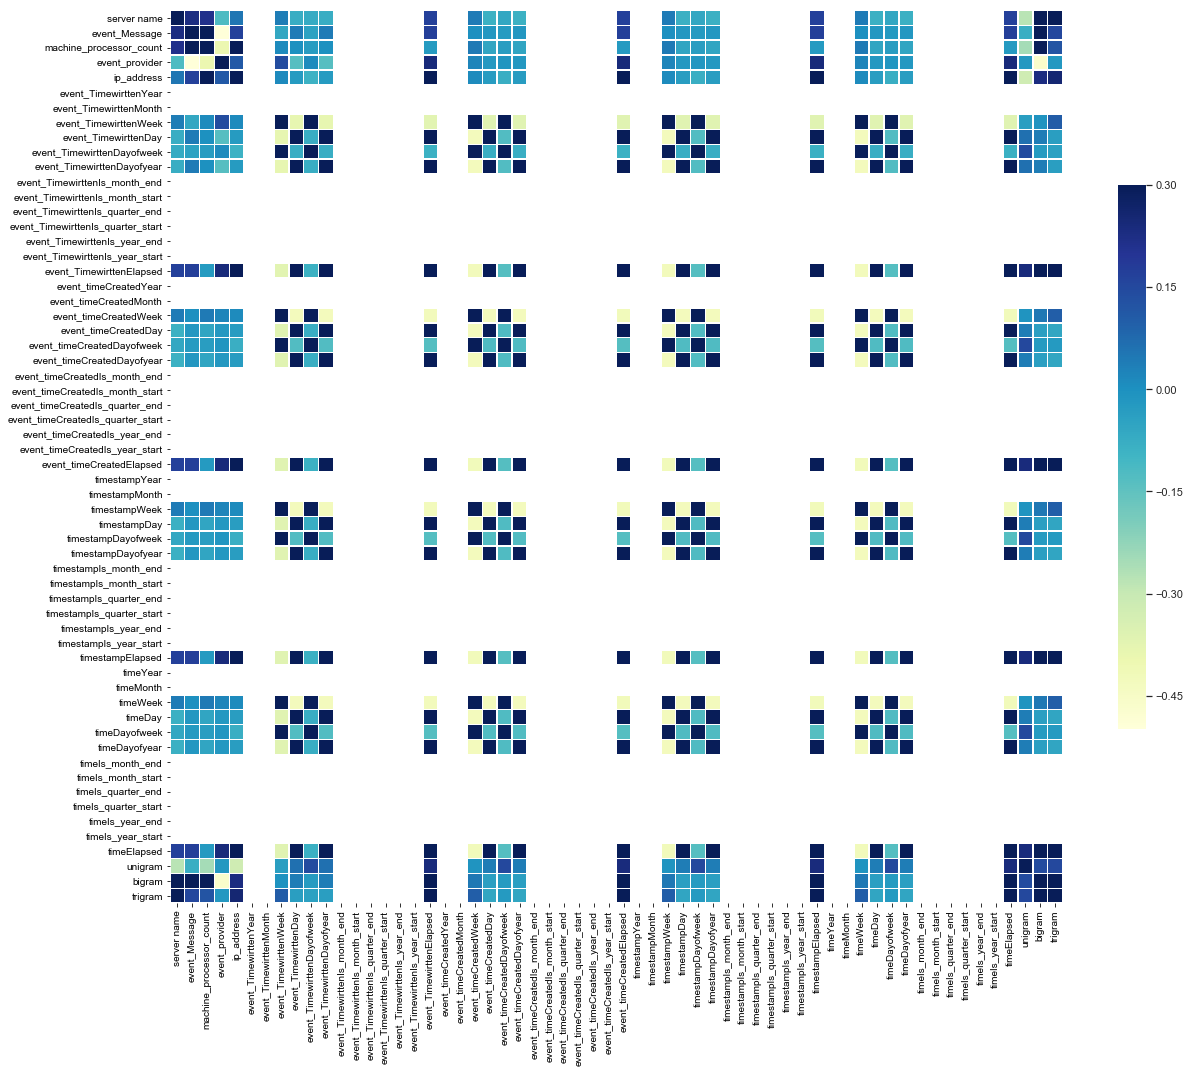

In [168]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale = 1)
sns.heatmap(train.corr(),square=True,annot=False,cmap="YlGnBu",vmax=0.3,
           linewidths=.5, cbar_kws={"shrink": .5})

In [183]:
df = train.corr()

In [179]:
features_to_drop = df.columns[df.isna().all()].tolist()

In [181]:
train = train.drop(features_to_drop,axis=1)

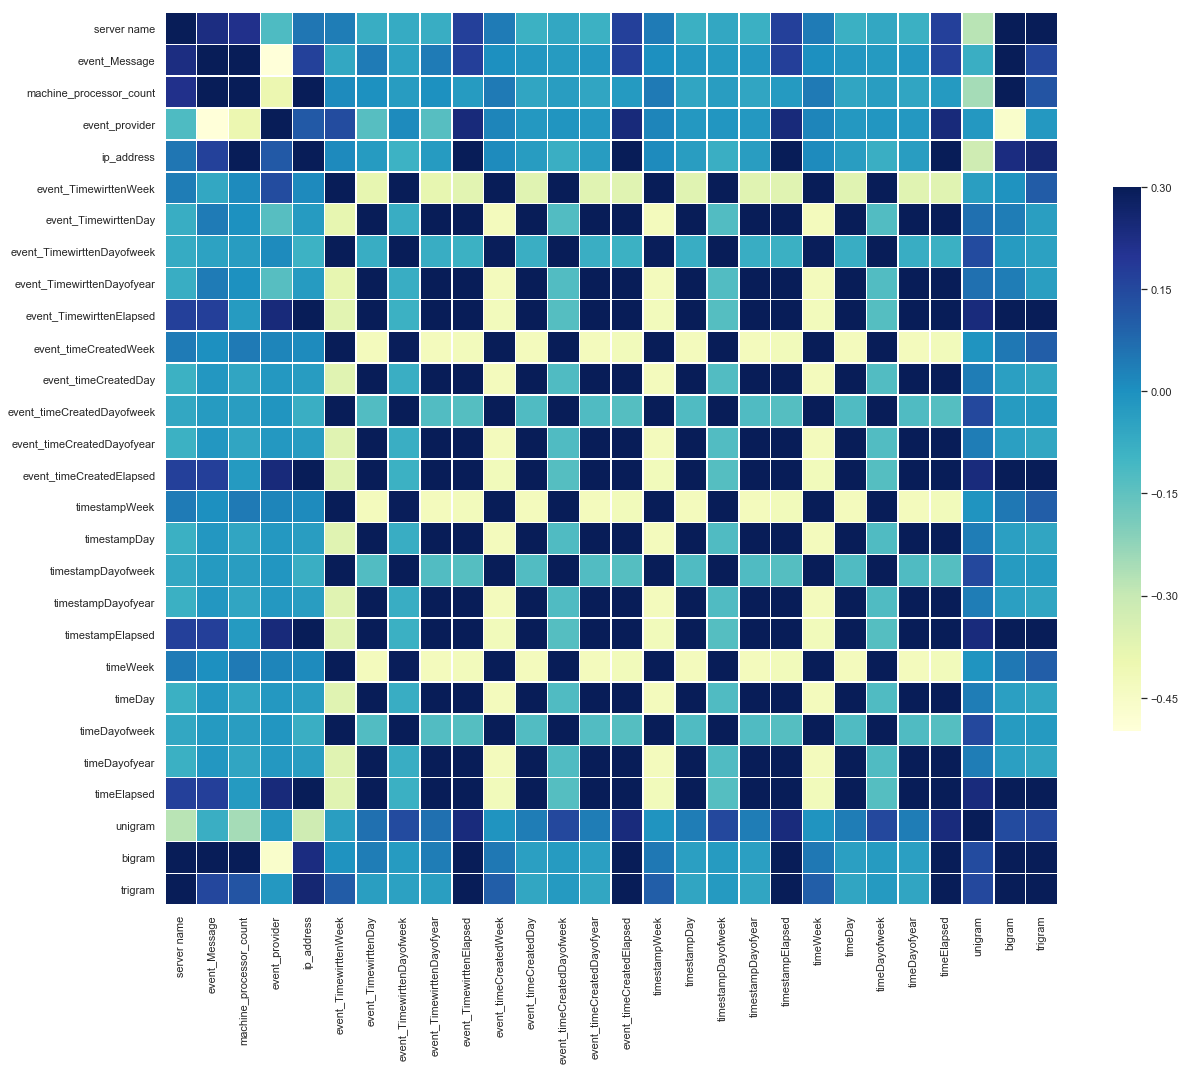

In [184]:
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale = 1)
sns.heatmap(train.corr(),square=True,annot=False,cmap="YlGnBu",vmax=0.3,
           linewidths=.5, cbar_kws={"shrink": .5})

In [195]:
train = train.fillna(0)

In [196]:
feature_cols = train.columns

In [197]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [198]:
min_max_scaler = preprocessing.MinMaxScaler()

In [199]:
np_scaled = min_max_scaler.fit_transform(train)
data_new = pd.DataFrame(np_scaled, columns=feature_cols)

/anaconda3/envs/opencv-forge/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


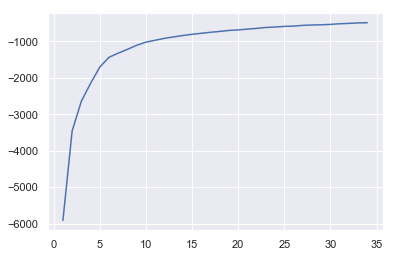

In [201]:
n_cluster = range(1, 35)
kmeans = [KMeans(n_clusters=i, random_state=23).fit(data_new) for i in n_cluster]
scores = [kmeans[i].score(data_new) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [202]:
cluster_model = kmeans[24]

In [203]:
train['cluster'] = cluster_model.predict(data_new)
train['cluster'].value_counts()

6     174
3     151
16    142
1     132
4     118
7     117
8     105
11    104
14    102
10    101
0      96
23     92
5      90
17     90
15     87
18     85
2      82
9      64
20     53
21     50
19     48
24     39
13     38
12     36
22     26
Name: cluster, dtype: int64

In [208]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=23)
tsne_results = tsne.fit_transform(data_new)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2222 samples in 0.010s...
[t-SNE] Computed neighbors for 2222 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2222
[t-SNE] Computed conditional probabilities for sample 2000 / 2222
[t-SNE] Computed conditional probabilities for sample 2222 / 2222
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.482708
[t-SNE] KL divergence after 300 iterations: 0.671026


In [225]:
train['event_Message'].nunique()

634

# Simple Anomaly Detector

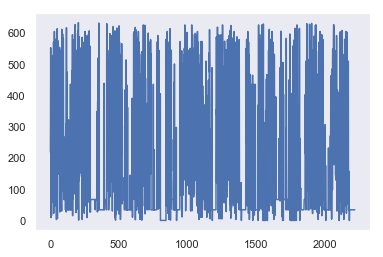

In [219]:
timeseries_values = train['event_Message'].values
timeseries_len = len(timeseries_values)
plt.plot(np.array(range(timeseries_len)), timeseries_values)
#plt.yscale('log')
plt.grid()

In [220]:
class AnomalyDetector(object):

  def __init__(self, window = 10):
    self._index = 0
    self._window = window
    self._values = np.zeros(window)
    self._valuesSq = np.zeros(window)
    self._mean = 0
    self._variance = 0
    self._count = 0

  def observation(self, value):
    anomaly = False

    threshold = 3 * np.sqrt(self._variance)
    if self._count > self._window:
      if value > self._mean + threshold:
        value = self._mean + threshold
        anomaly = True
      elif value < self._mean - threshold:
        value = self._mean - threshold
        anomaly = True
    else:
      self._count += 1

    prev_value = self._values[self._index]
    self._values[self._index] = value
    self._valuesSq[self._index] = value ** 2
    self._index = (self._index + 1) % self._window

    self._mean = self._mean - prev_value / self._window + value / self._window
    self._variance = sum(self._valuesSq) / self._window - (self._mean ** 2)

    return anomaly, self._mean

In [221]:
anomalies = np.zeros(timeseries_len)
means = np.zeros(timeseries_len)

anomaly_detector = AnomalyDetector(36)

for i, value in enumerate(timeseries_values):
  anomaly, mean = anomaly_detector.observation(value)
    
  anomalies[i] = anomaly
  means[i] = mean

/anaconda3/envs/opencv-forge/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


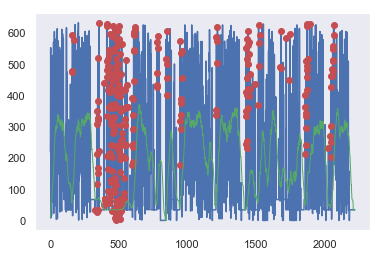

In [222]:
ticks = np.array(range(timeseries_len))

plt.plot(ticks, timeseries_values)
plt.plot(ticks[anomalies == 1], timeseries_values[anomalies == 1], 'ro')
plt.plot(ticks, means, 'g', linewidth = 1)
#plt.yscale('log')
plt.grid()
